<a href="https://colab.research.google.com/github/giovanadelucca/Deep-Learning-Cid20-UEA/blob/main/trabalho_3_deep_learning_cid20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd ./yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 9955, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 9955 (delta 14), reused 18 (delta 7), pack-reused 9923
Receiving objects: 100% (9955/9955), 10.24 MiB | 24.04 MiB/s, done.
Resolving deltas: 100% (6895/6895), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import torch
from IPython.display import Image

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.9.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [3]:
%cd ../
!curl -L "https://app.roboflow.com/ds/dto3x5hqYl?key=8jeqz19Ds3" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1750      0 --:--:-- --:--:-- --:--:--  1750
100 52.6M  100 52.6M    0     0  58.2M      0 --:--:-- --:--:-- --:--:--  248M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/dois_por_dois019_jpg.rf.90b4baa9918e3edb2bde24b2ebaf1490.jpg  
 extracting: test/images/dois_por_dois040_jpg.rf.eab552c0a64c7e0b31e94e7247c787a2.jpg  
 extracting: test/images/dois_por_dois044_jpg.rf.c4fd1c01aadad7107ee27c821d444a47.jpg  
 extracting: test/images/dois_por_dois051_jpg.rf.cc87c2234c569e5166d37755feff42b9.jpg  
 extracting: test/images/dois_por_dois059_jpg.rf.a09c7737fb54e07892157be4aa18faf4.jpg  
 extracting: test/images/dois_por_dois060_jpg.rf.2a02

In [11]:
# Train YOLOv5s on custom data for 10 epochs
%cd ./yolov5
!python train.py --img 640 --batch 32 --epochs 20 --data /content/data.yaml --weights yolov5s.pt

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-66-g3364379 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate

In [12]:
!ls runs/train/exp

confusion_matrix.png				   results.csv
events.out.tfevents.1636171494.57fcd8d0c974.177.0  results.png
F1_curve.png					   train_batch0.jpg
hyp.yaml					   train_batch1.jpg
labels_correlogram.jpg				   train_batch2.jpg
labels.jpg					   val_batch0_labels.jpg
opt.yaml					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   weights


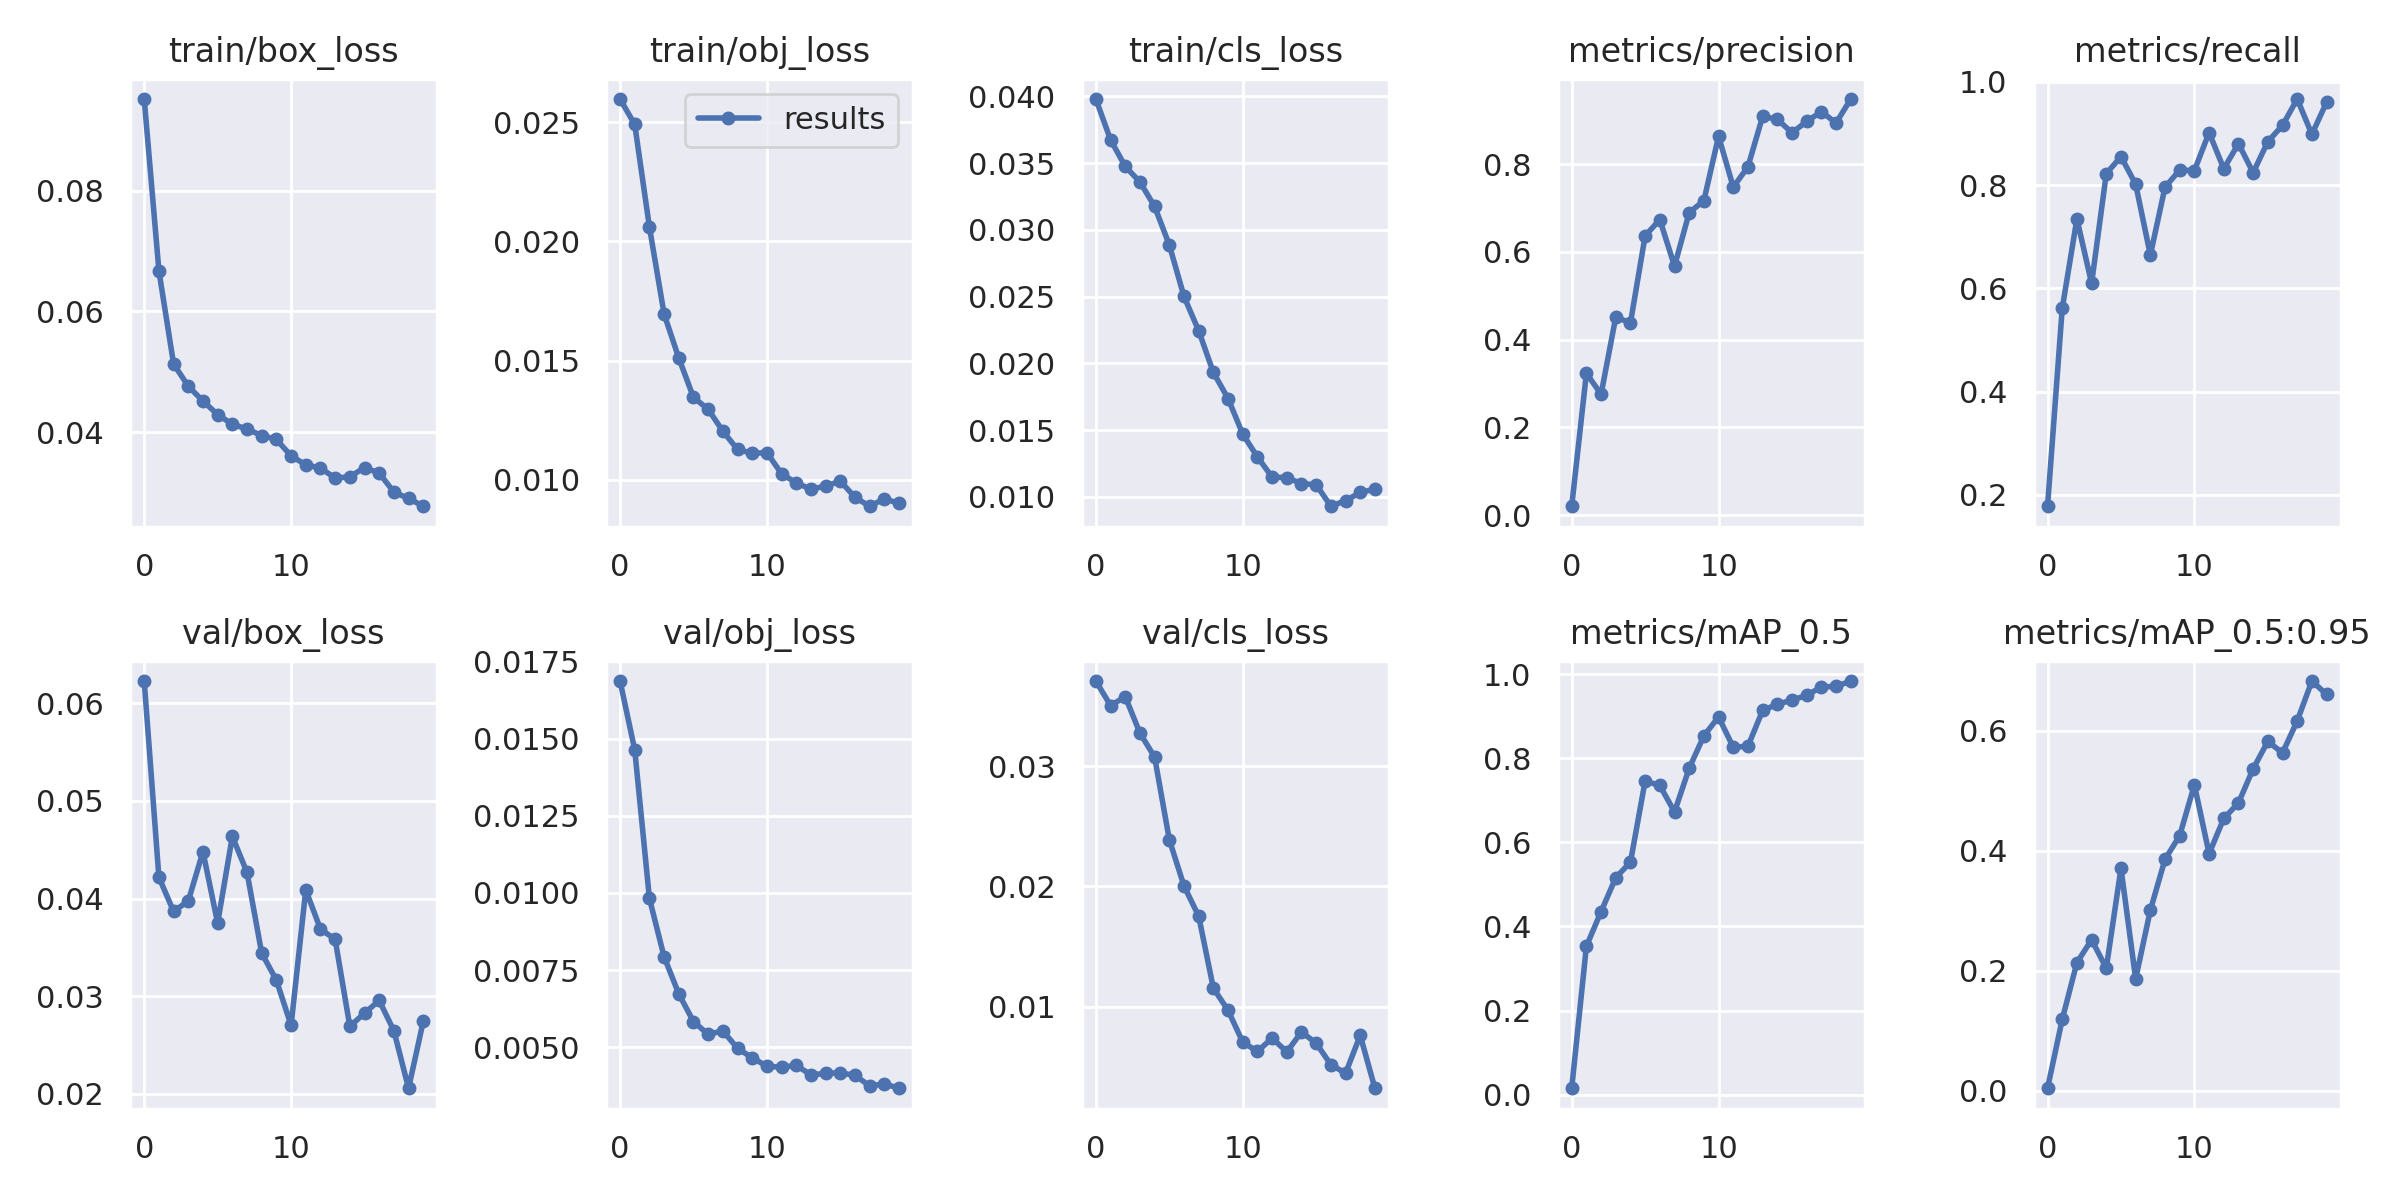

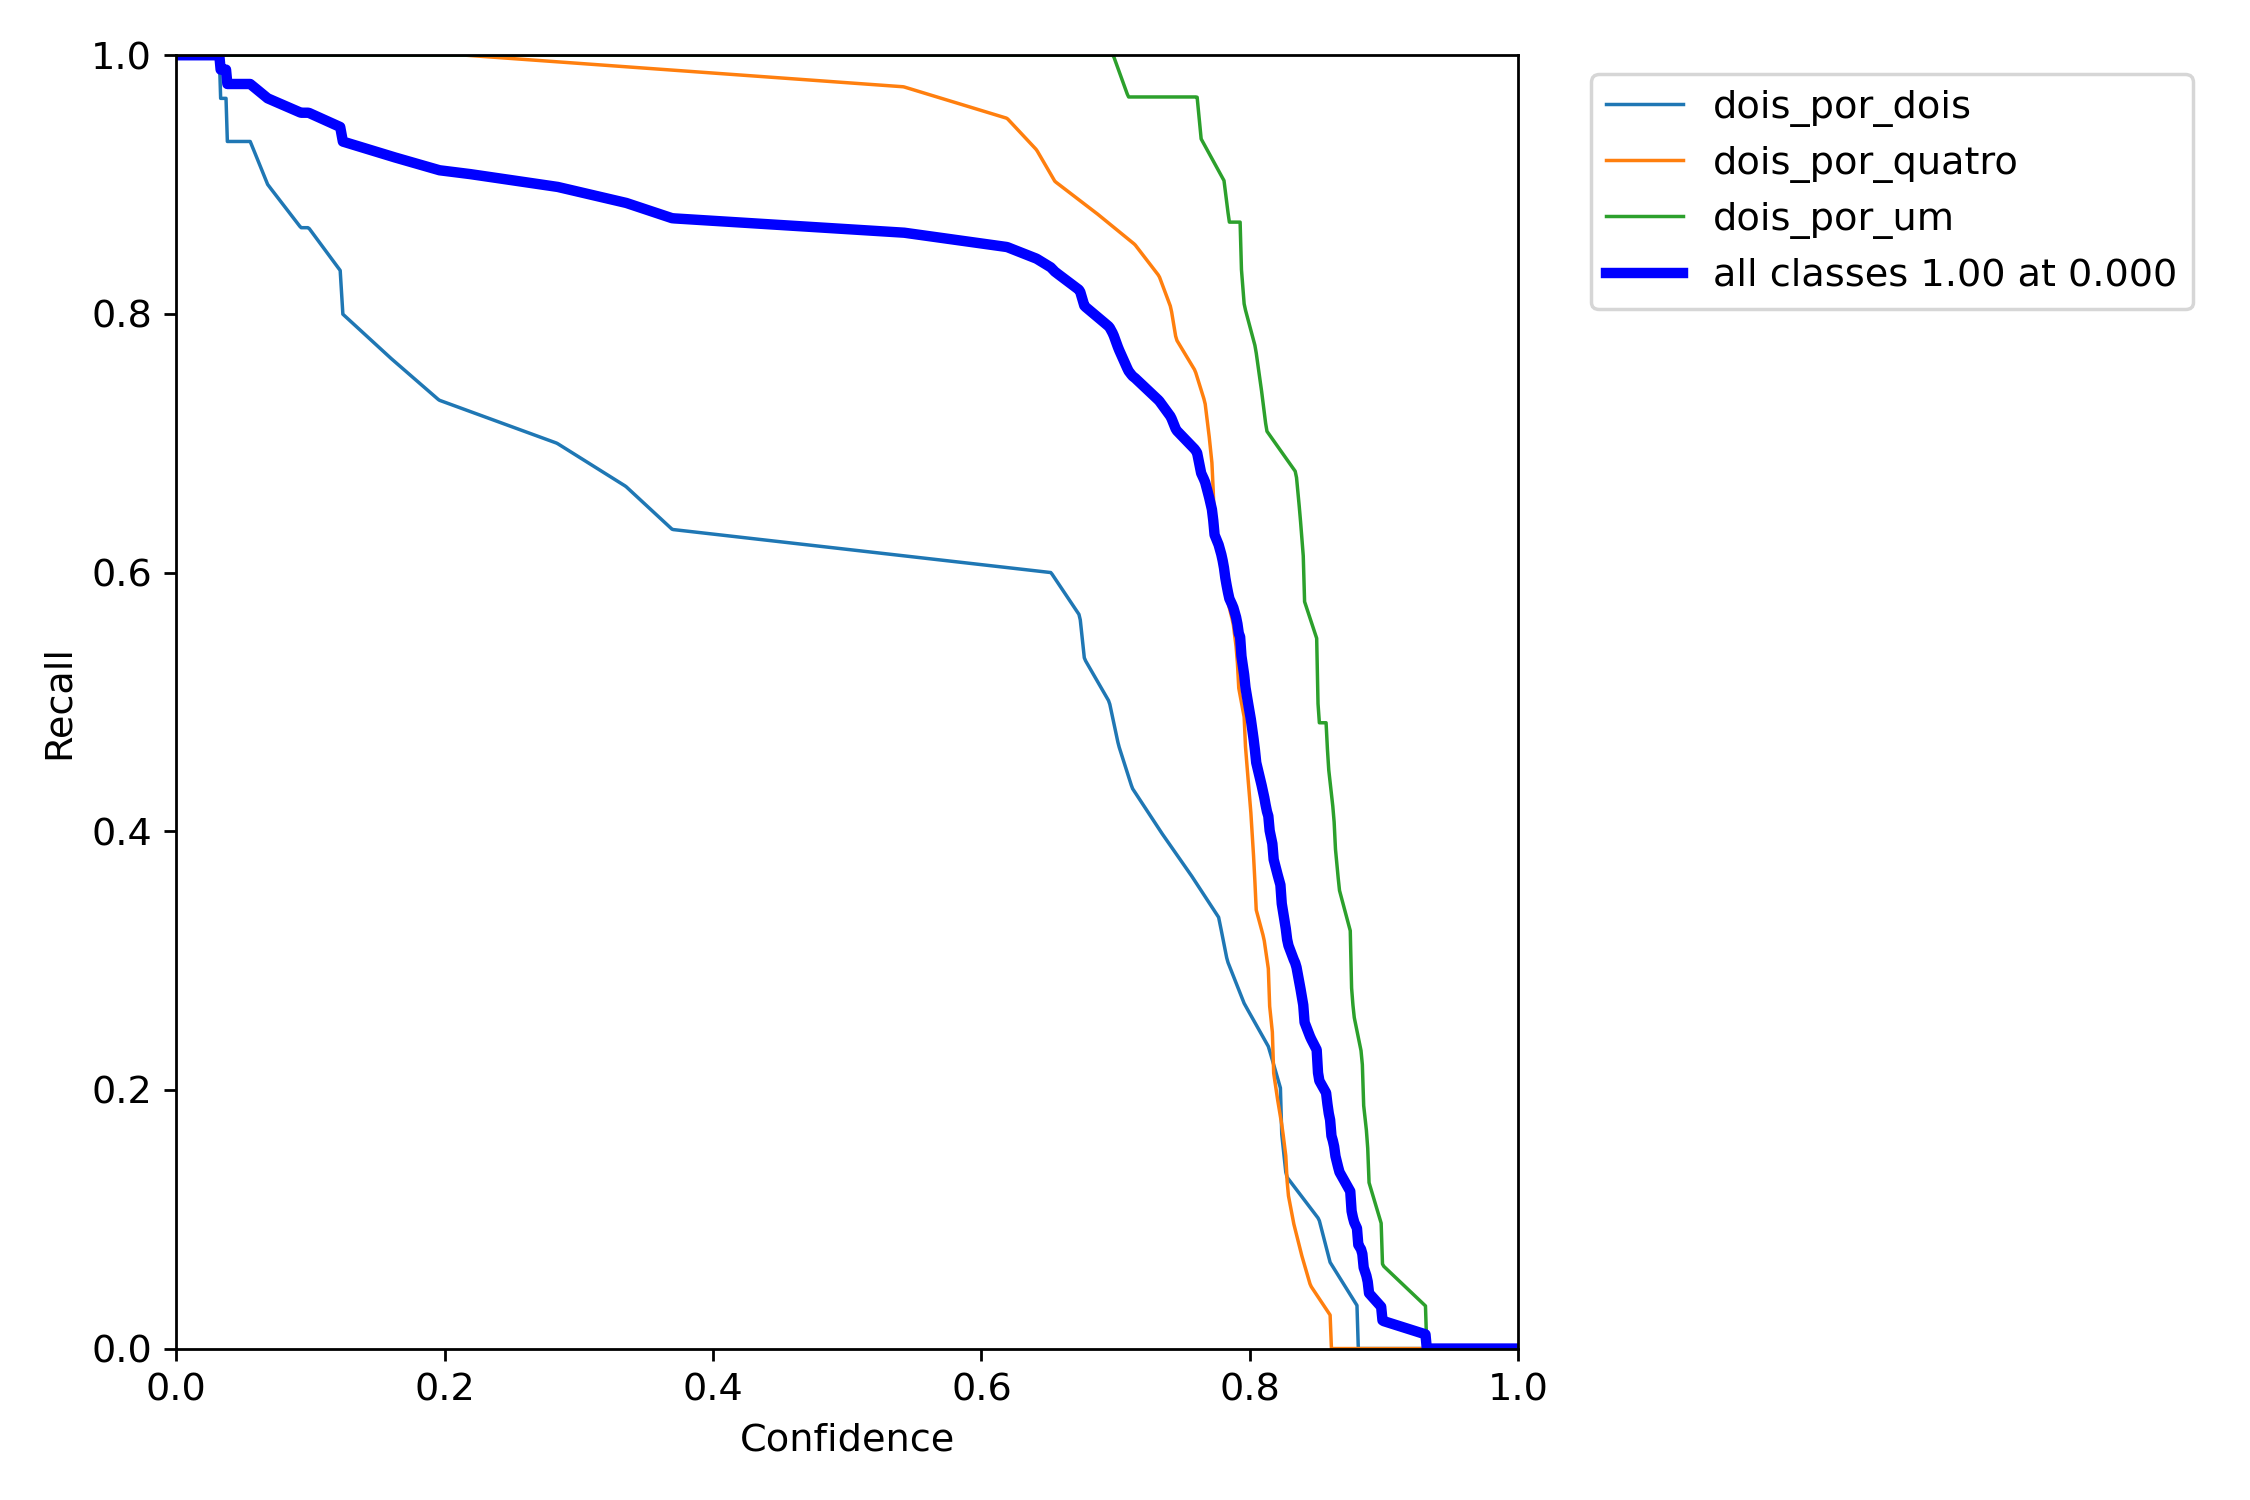

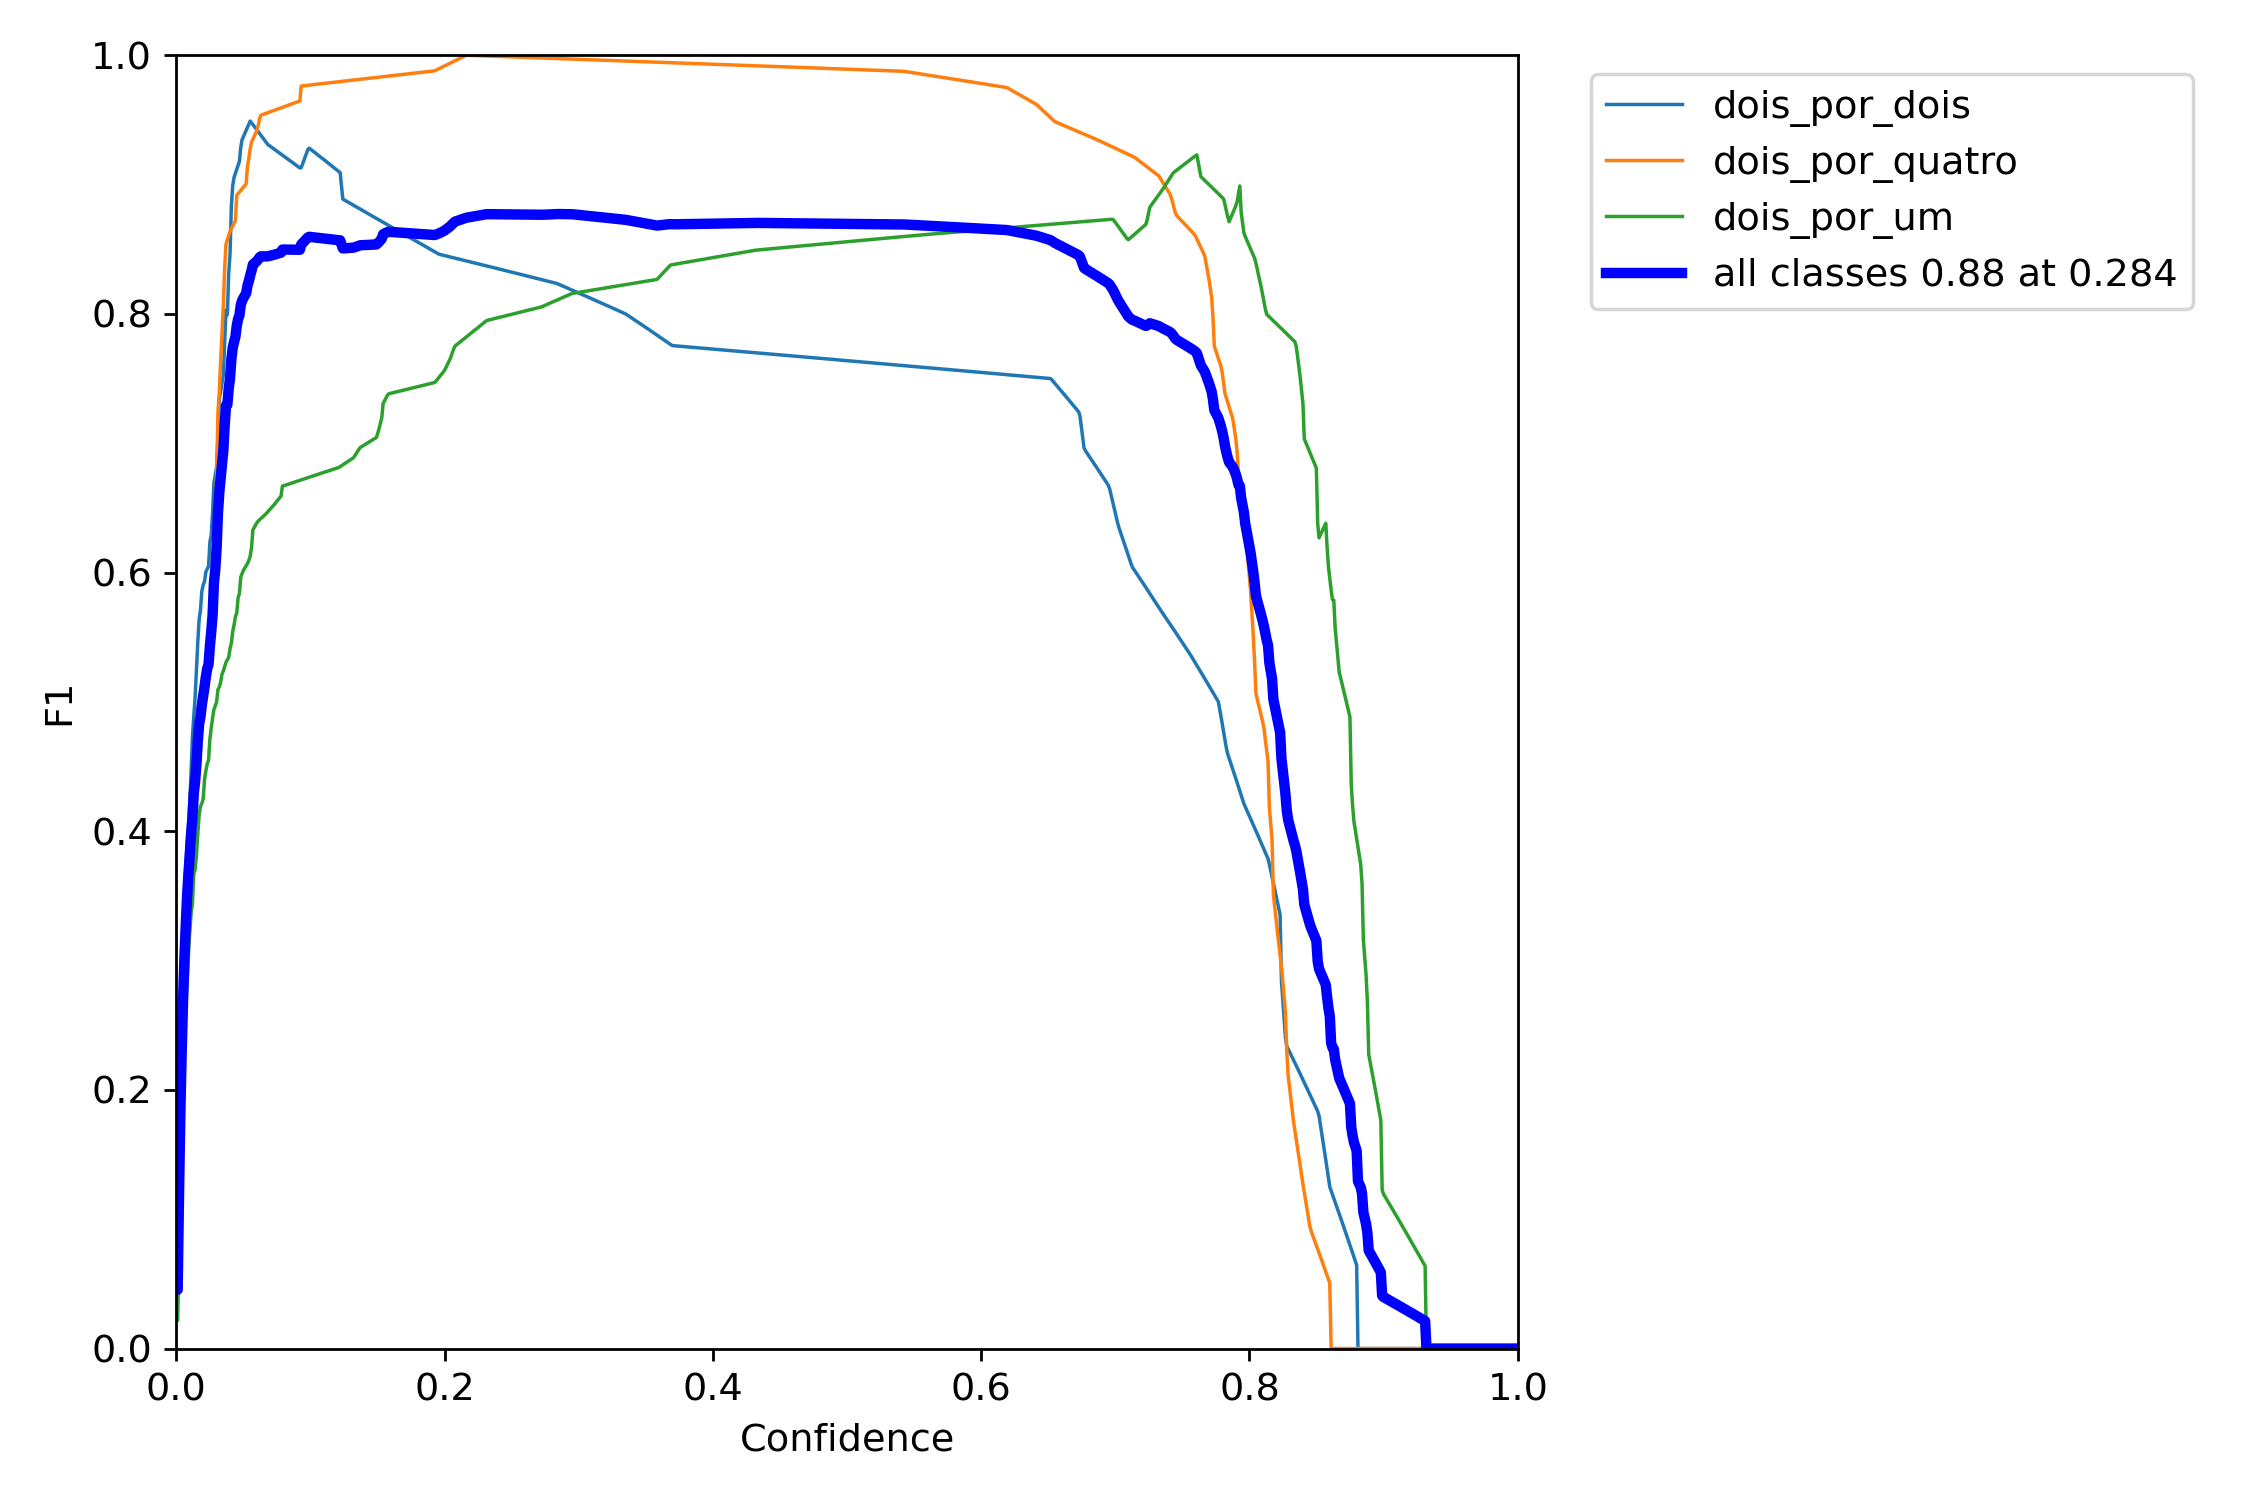

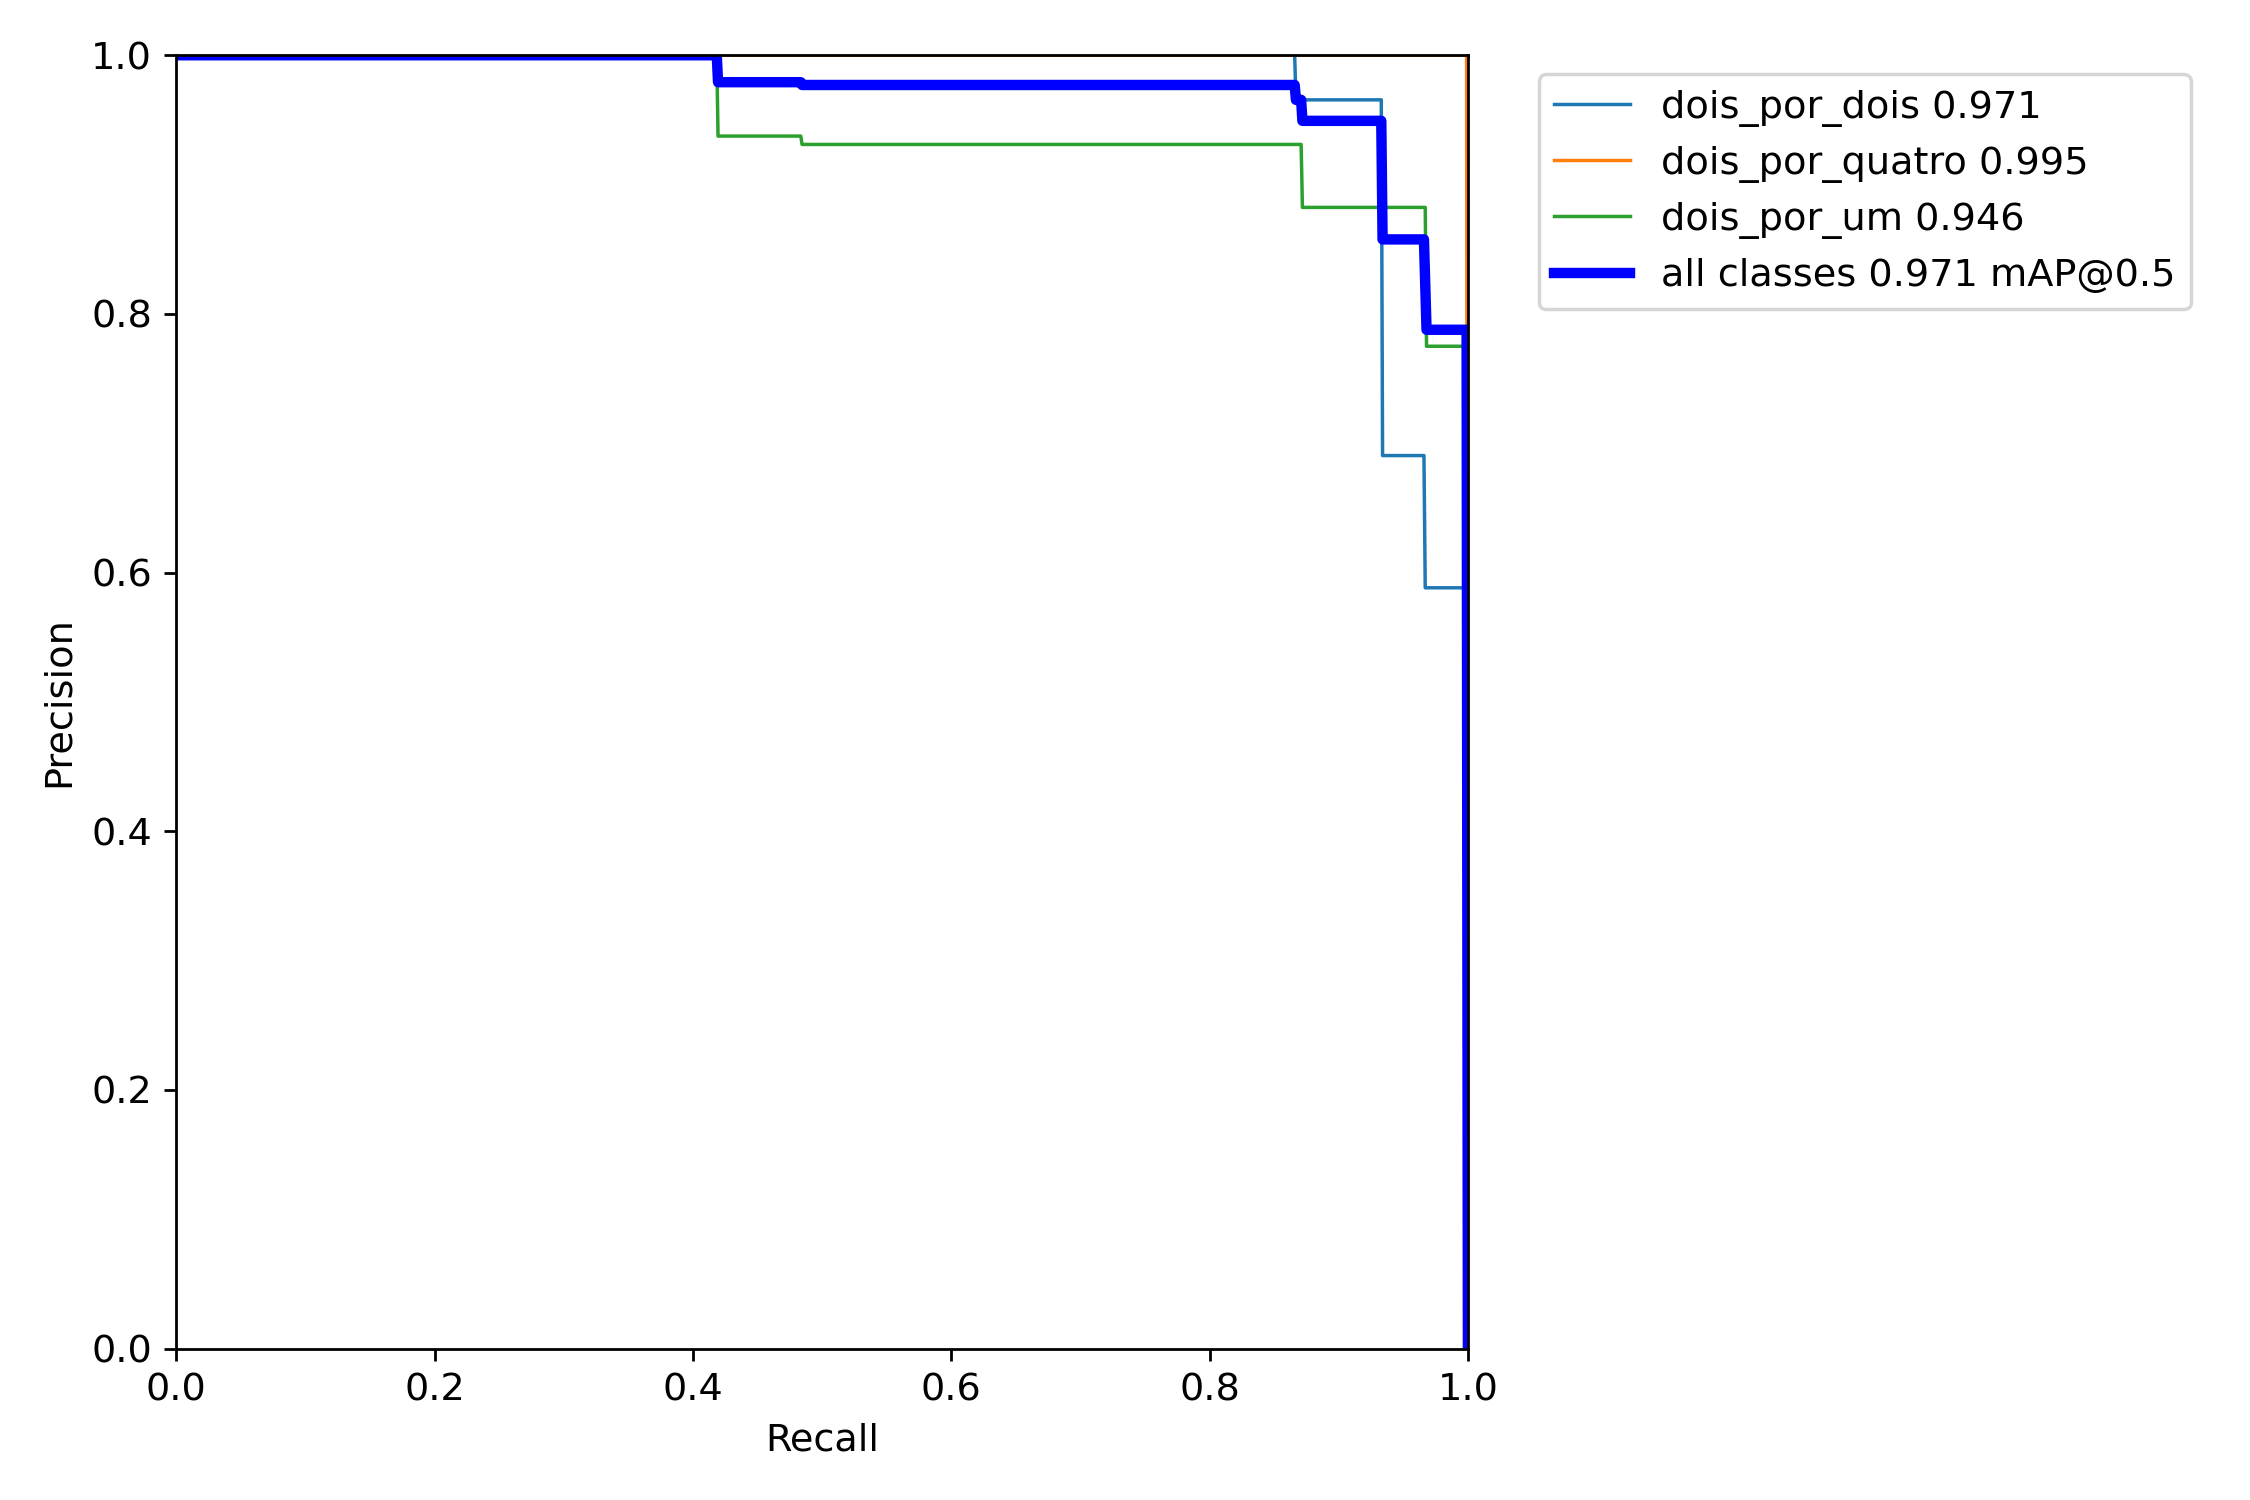

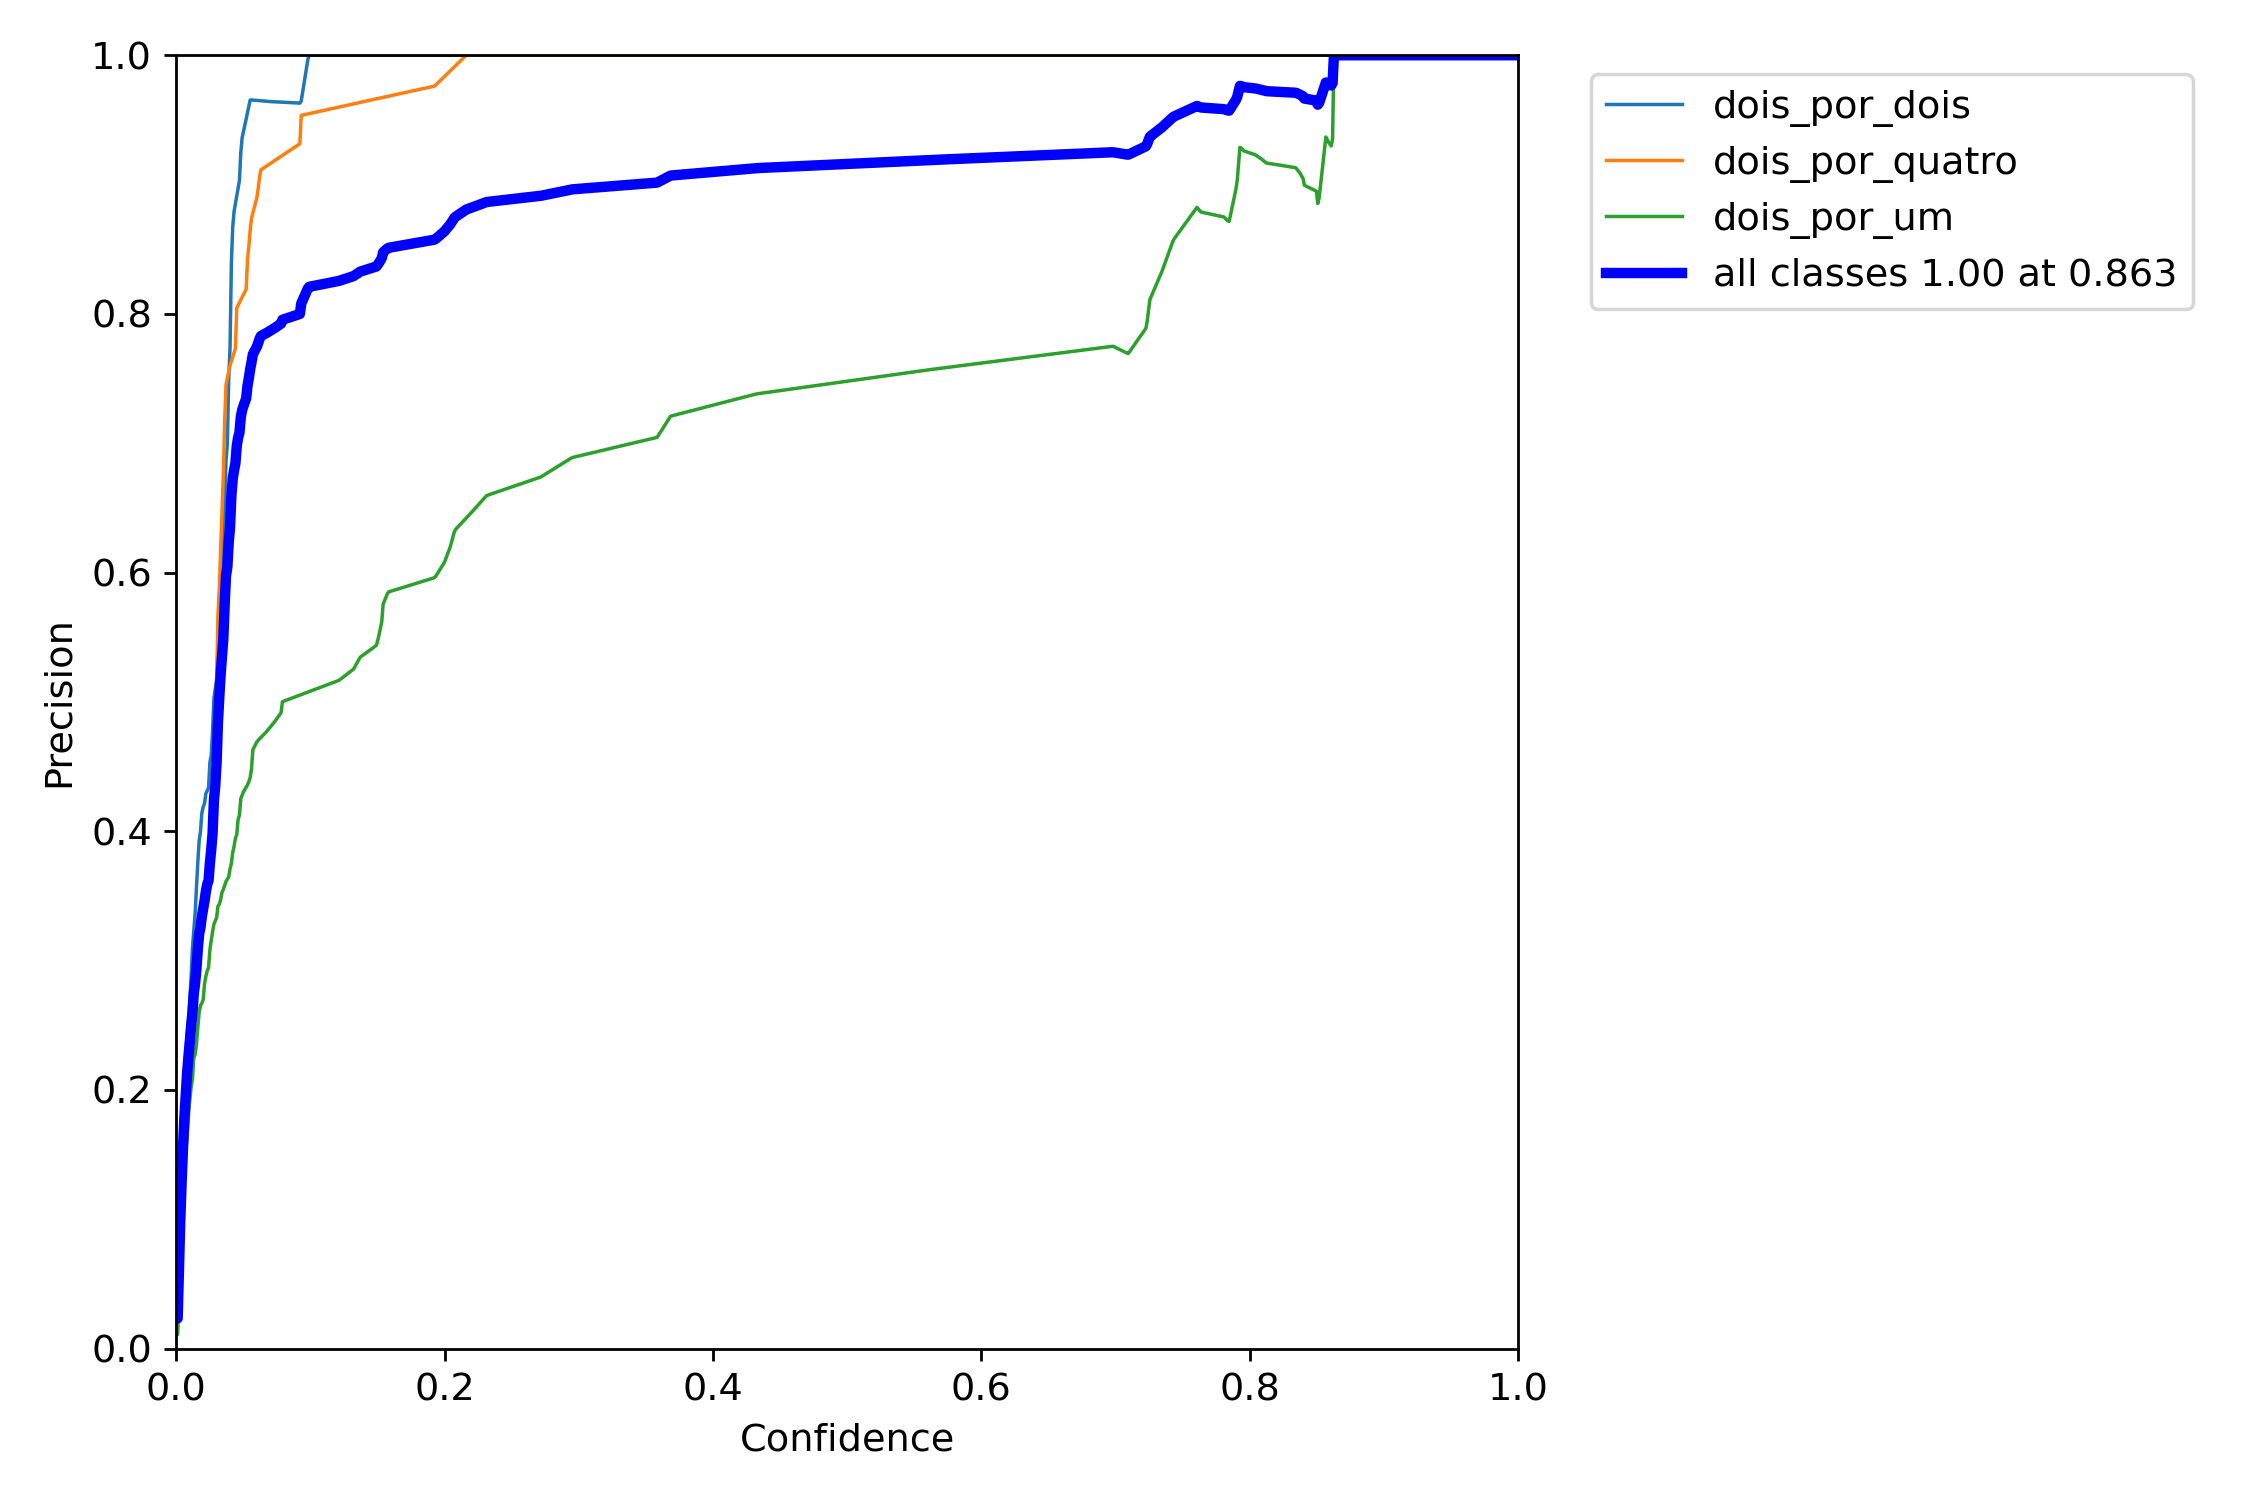

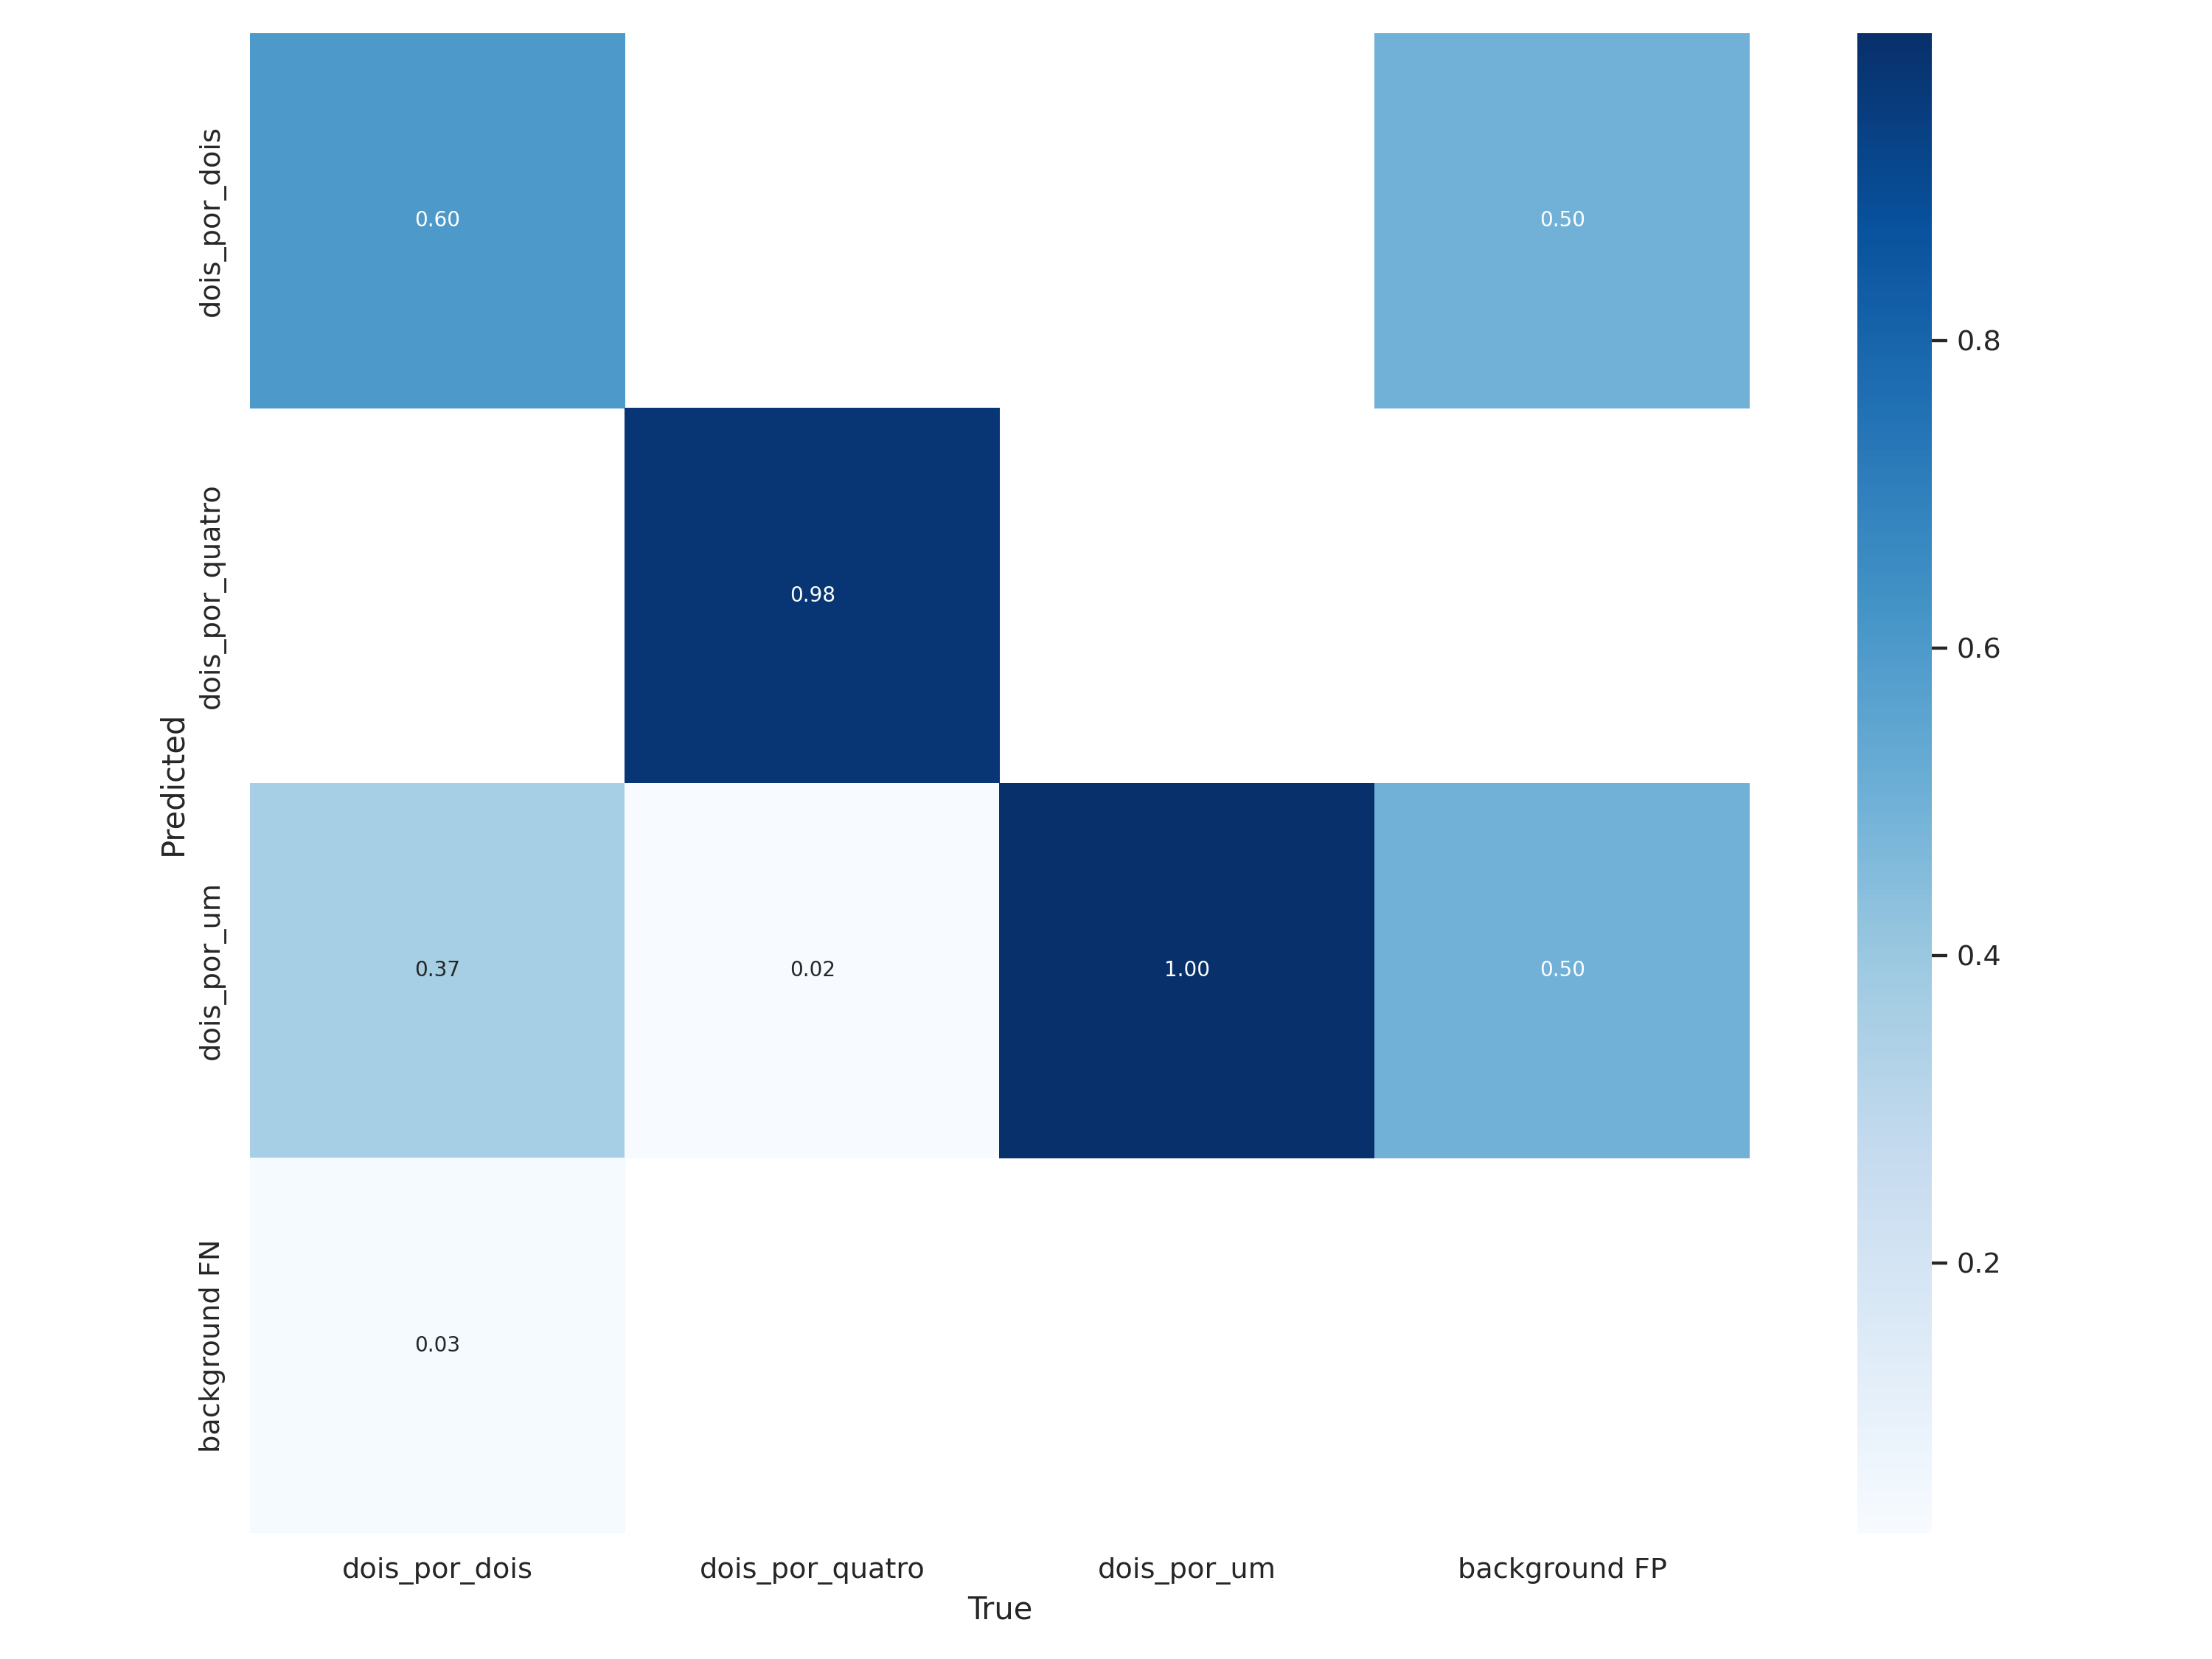

In [13]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/train/exp/*.png'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [14]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source /content/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/test/images, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-66-g3364379 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/51 /content/test/images/dois_por_dois019_jpg.rf.90b4baa9918e3edb2bde24b2ebaf1490.jpg: 640x640 1 dois_por_dois, Done. (0.023s)
image 2/51 /content/test/images/dois_por_dois040_jpg.rf.eab552c0a64c7e0b31e94e7247c787a2.jpg: 640x640 1 dois_por_dois, Done. (0.023s)
image 3/51 /content/test/images/dois_por_dois044_jpg.rf.c4fd1c01aadad7107ee27c821d444a47.jpg: 640x640 1 dois_por_dois, Done. (0.023

In [18]:
!ls ./runs/detect/exp

dois_por_dois019_jpg.rf.90b4baa9918e3edb2bde24b2ebaf1490.jpg
dois_por_dois040_jpg.rf.eab552c0a64c7e0b31e94e7247c787a2.jpg
dois_por_dois044_jpg.rf.c4fd1c01aadad7107ee27c821d444a47.jpg
dois_por_dois051_jpg.rf.cc87c2234c569e5166d37755feff42b9.jpg
dois_por_dois059_jpg.rf.a09c7737fb54e07892157be4aa18faf4.jpg
dois_por_dois060_jpg.rf.2a028cd33317ef7c0ae3af7a7db59ec1.jpg
dois_por_dois066_jpg.rf.739d67669d01fdc9dd9e61f1424d1126.jpg
dois_por_dois067_jpg.rf.495c5b01d3d4361991ef049bff9686fa.jpg
dois_por_dois071_jpg.rf.f362e33b81a904508ebbc0ce99d15074.jpg
dois_por_dois083_jpg.rf.ac8fd06083ca4118cdf5e3a69ed06924.jpg
dois_por_dois106_jpg.rf.065d27ebfc5b77ee812d4f1f2ceb3b57.jpg
dois_por_dois108_jpg.rf.51c7cca54078a5e7993ecc45f5eacfaf.jpg
dois_por_dois110_jpg.rf.78e946842d945f48253fe9b4b8af6b33.jpg
dois_por_dois112_jpg.rf.66dc0afbd4cc9e21c13ebe7e61c9e7ac.jpg
dois_por_dois113_jpg.rf.61784b0a8b973369b3aa4e696fb664cc.jpg
dois_por_dois122_jpg.rf.05f041d3fc9da4f734e7ee92031ae938.jpg
dois_por_dois137_jpg.rf.

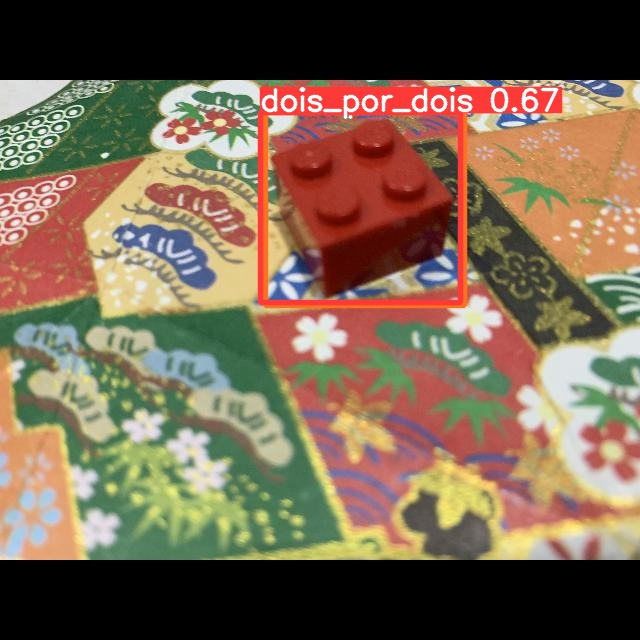

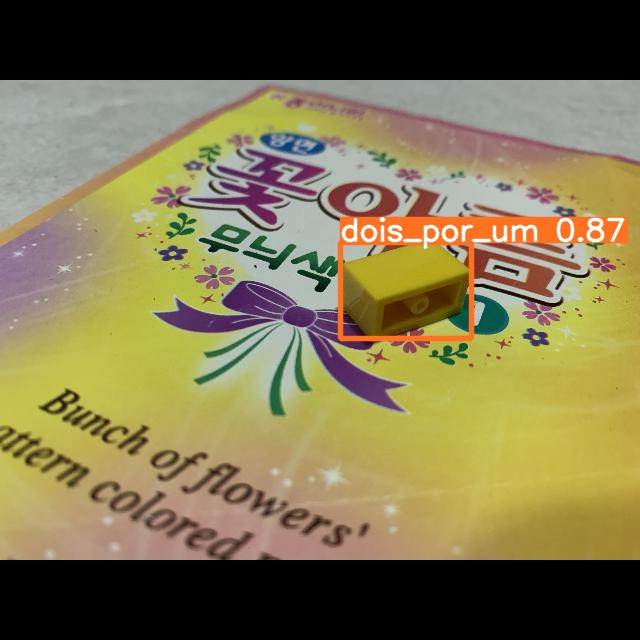

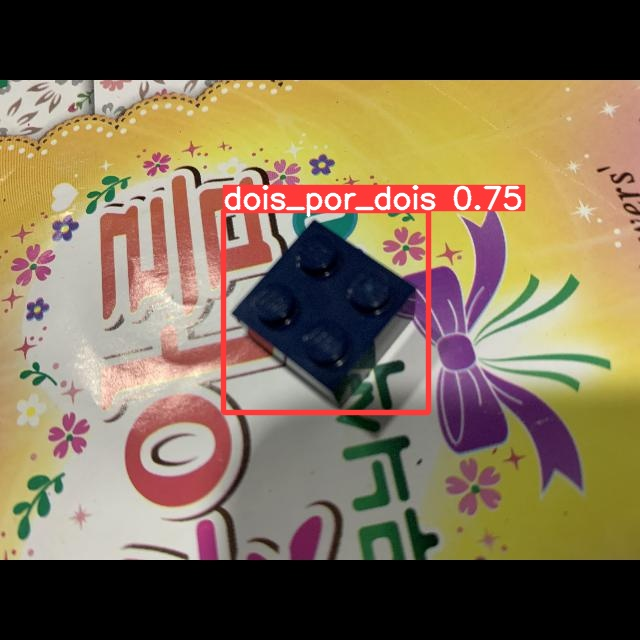

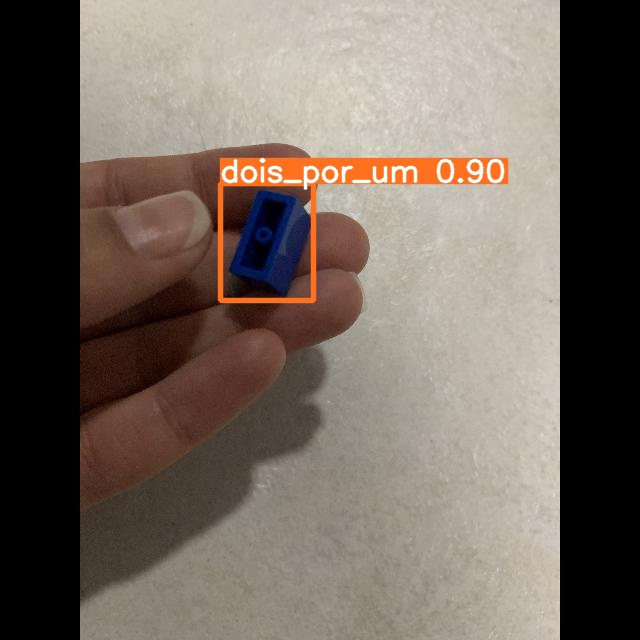

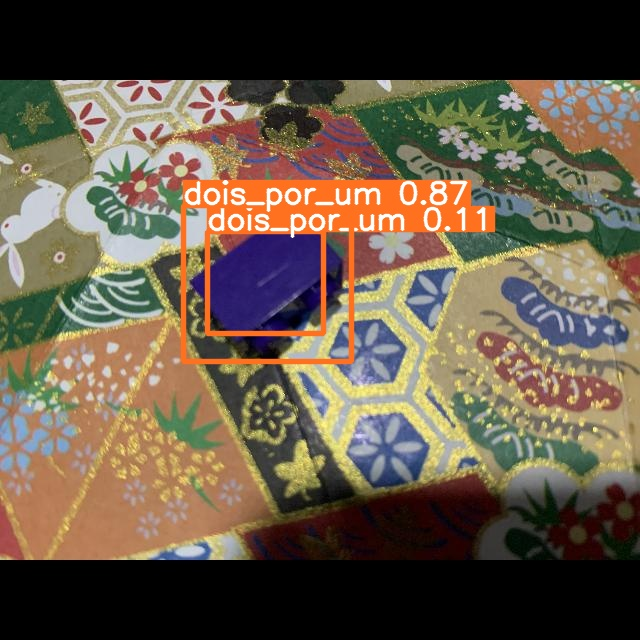

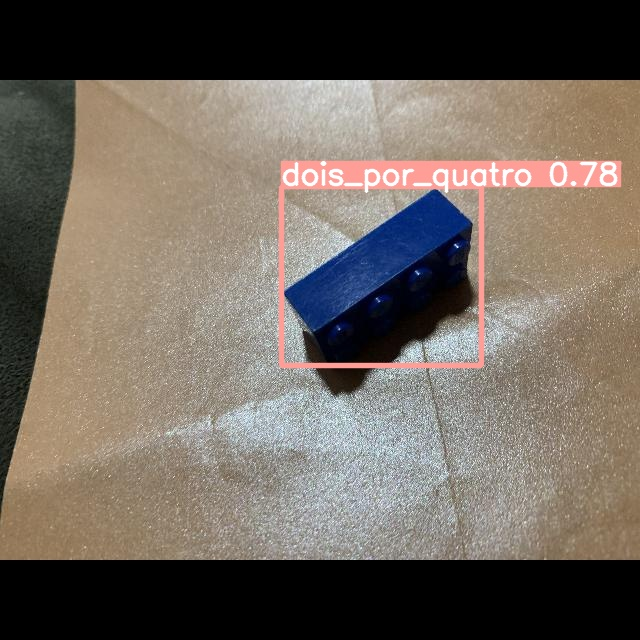

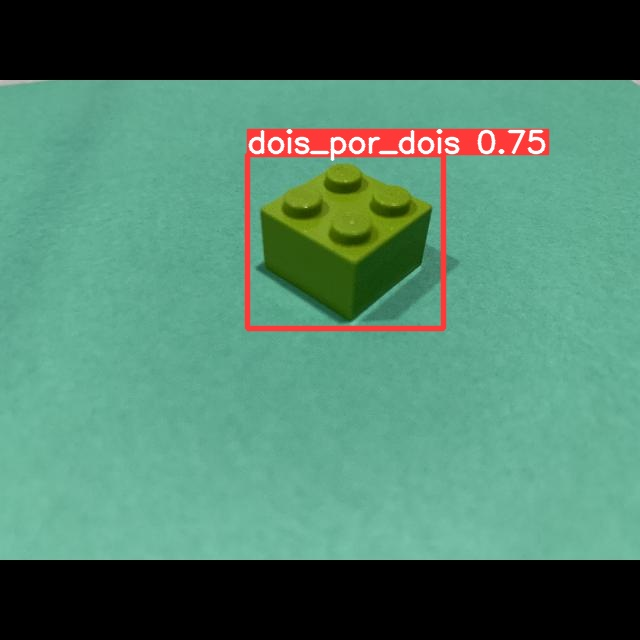

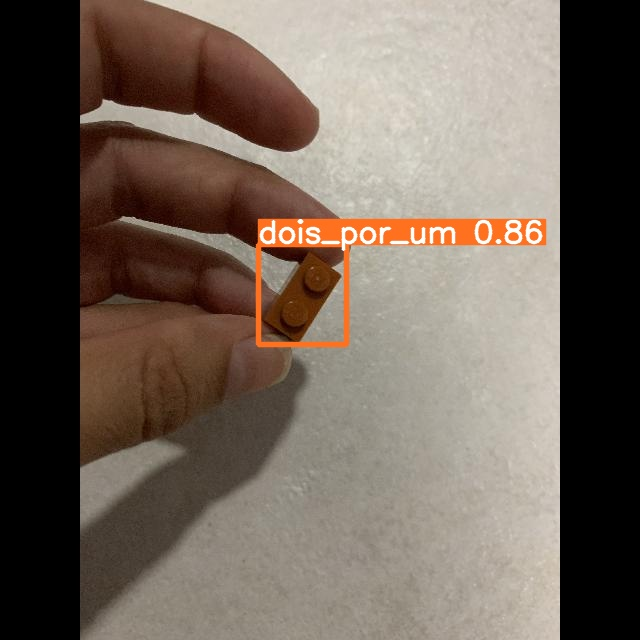

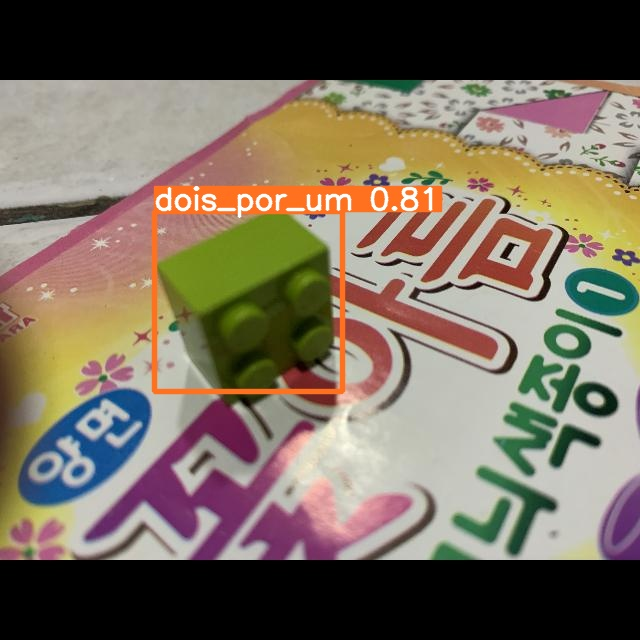

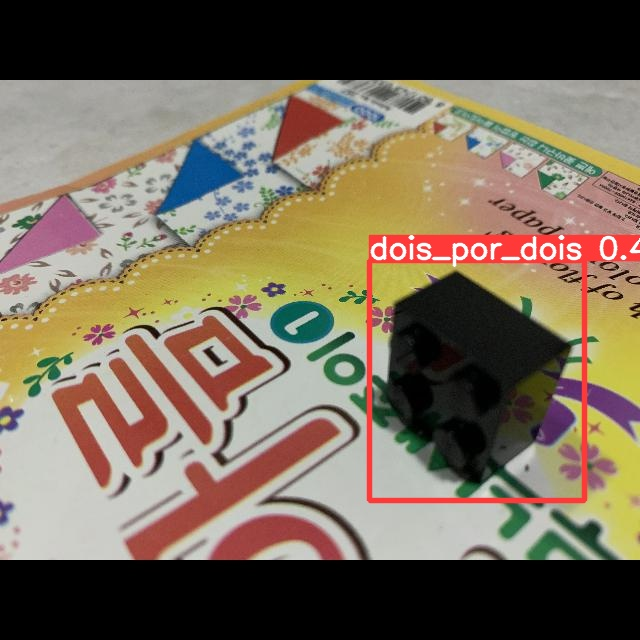

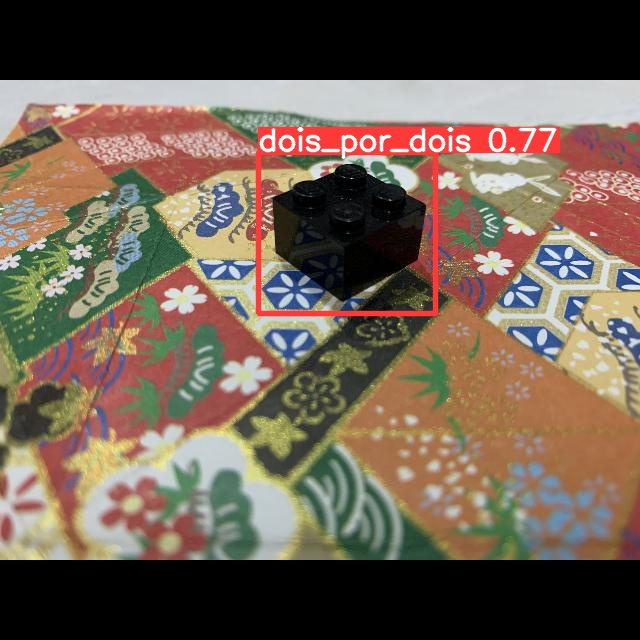

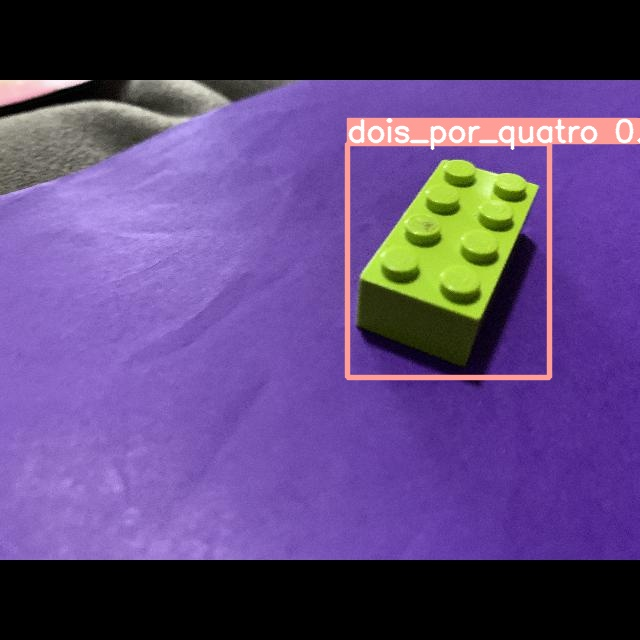

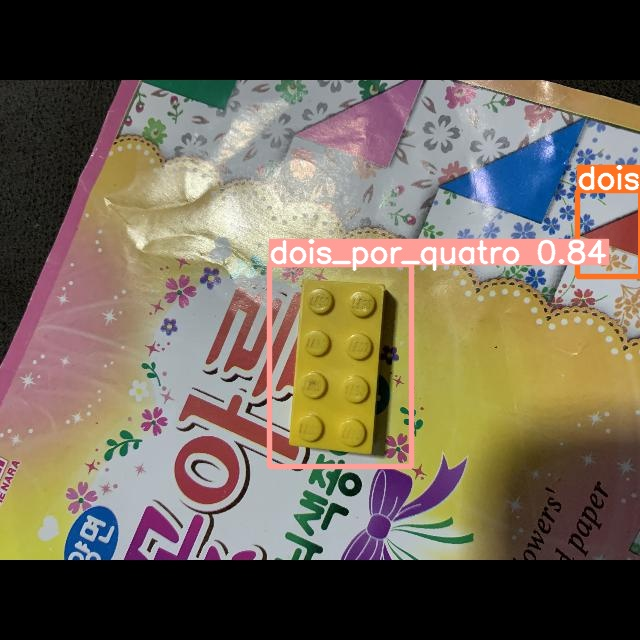

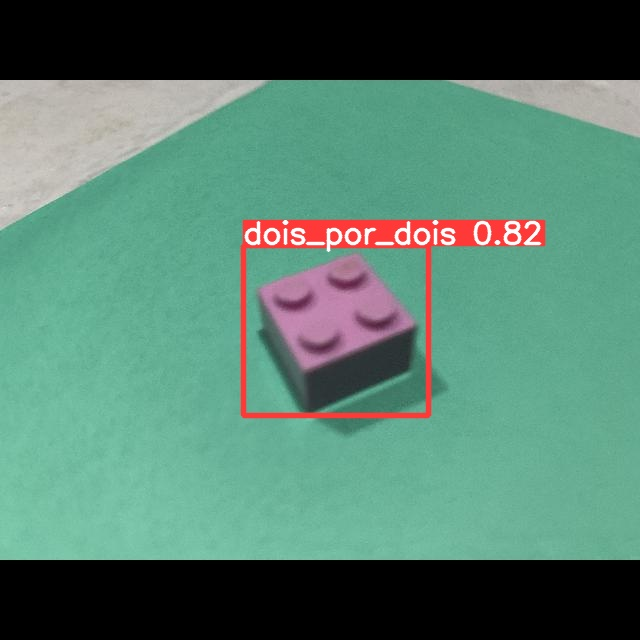

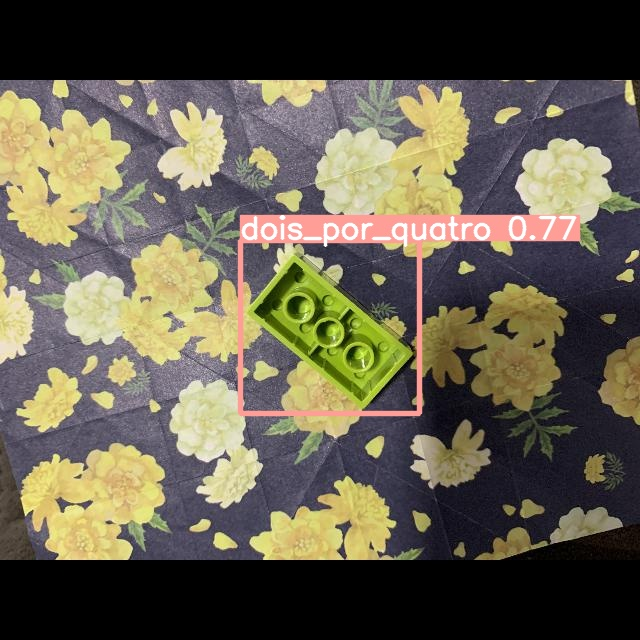

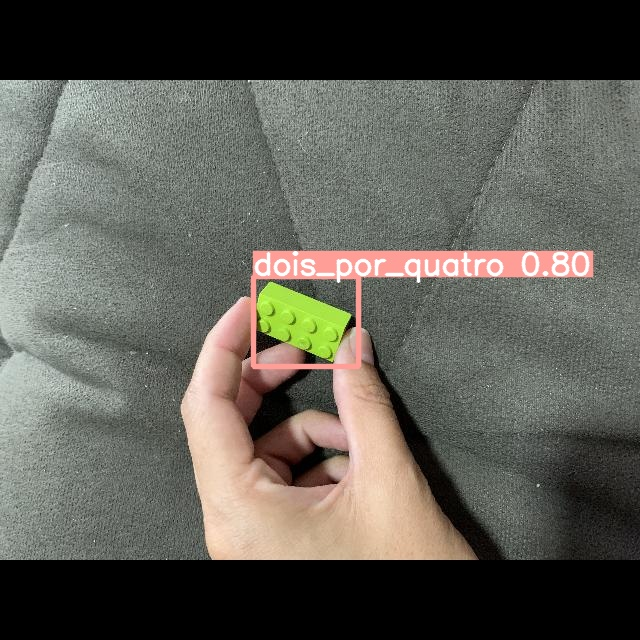

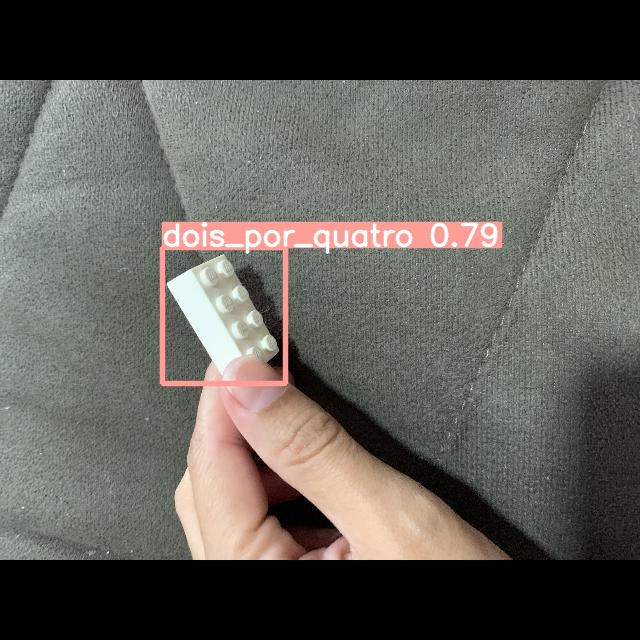

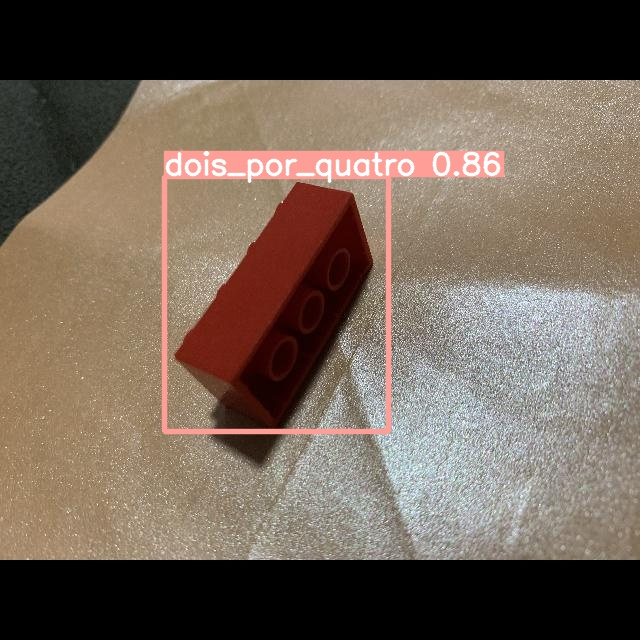

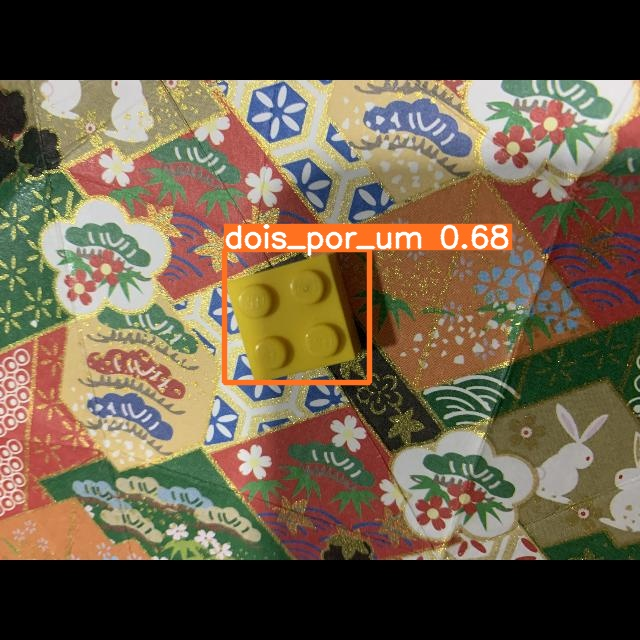

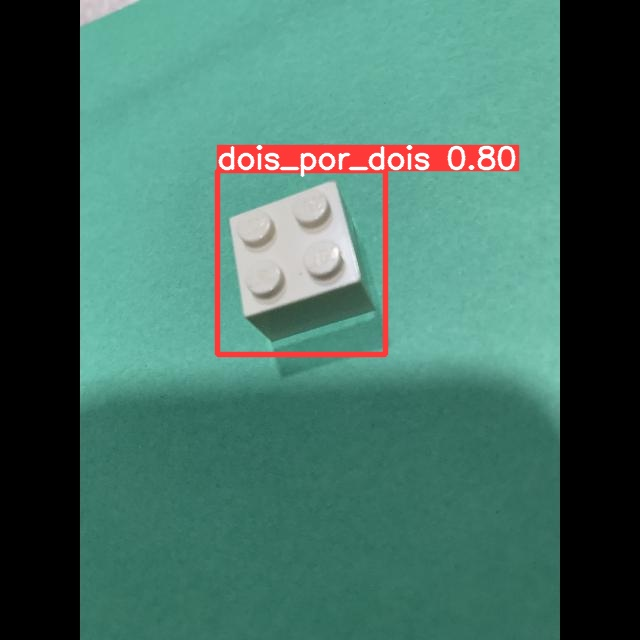

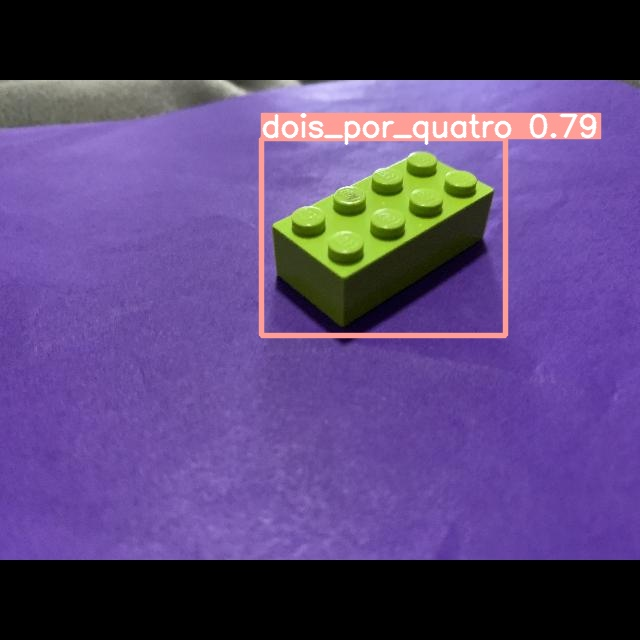

In [20]:
import glob
from IPython.display import Image, display

for i, imageName in enumerate(glob.glob('/content/yolov5/runs/detect/exp/*.jpg')): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
    if i == 20:
        break